# 主题：多层线性模型分析追踪数据：神经质与压力对每日消极情绪水平的影响

# 目录

### 1、多层线性模型的基本概念

### 2、建立基本的MLM模型

# 

# 多层线性模型（multilevel model）的基本概念

#### 最基本的MLM可以写作：

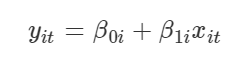

 β1i 是个体 i 的对x的斜率，β0i 是个体i的截距水平，
 
 该公式的含义： 个体i的 y 有一个一般的水平 β0i ， 还有一个被x解释的水平
 
 #### 除了第一层个体内的效应，还有第二层描述个体间的效应，可以分离为：
 
 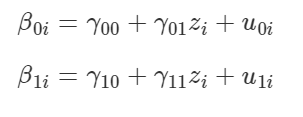
 
 γ01 是个体 z 对个体一般水平的影响，γ00 是扣除 z 的影响后个体的一般水平，u0i是残差项
 
 γ11 是个体 z 对斜率项的影响， γ10 是扣除 z 的影响后个体斜率水平， u1i是残差项
 
 #### 以上等式满足：
 
 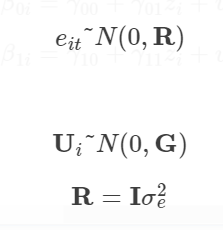
 
 eit 是第一层个体内残差，满足均值为0，方差为R 的正态分布
 
 第二层的残差满足均值为0， 方差为G，G包含 u0i 和 u1i，即：
 
 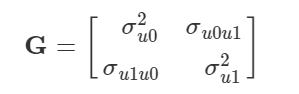
 
 以上个体内残差和个体间残差均值为 0 意味效应都被解释清楚了，剩余的残差是随机的。
 
 #### 这样两层的模型描述了个体间和个体内的关键效应，“层” 是相对的，个体和个体内构成嵌套的 “层” 关系，组织和个人构成嵌套 “层” 关系， 国家和组织构成嵌套的 “层”关系......
 
 

In [2]:
library(psych)      # 用来描述数据
library(plyr)       # 含有管道符，用来做数据整理
library(ggplot2)    # 可视化
library(lme4)       # MLM 建模
library(lmerTest)   # 计算 p 值

Warning message:
"程辑包'psych'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'plyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'ggplot2'是用R版本4.2.3 来建造的"

载入程辑包：'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"程辑包'lme4'是用R版本4.2.3 来建造的"
载入需要的程辑包：Matrix

Warning message:
"程辑包'Matrix'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'lmerTest'是用R版本4.2.2 来建造的"

载入程辑包：'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




## 举例： 个体神经质和每日压力对每日消极情绪的影响


每天的消极情绪：daily negaff

每日压力： pss

个体神经质水平 ：bfi_n

#### 载入个体间变量和数据

In [3]:
# 路径
filepath <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与多层线性模型/AMIBshare_persons_2019_0501.csv"
# 读取csv数据
AMIB_persons <- read.csv(file=filepath,header=TRUE)

# 对感兴趣的变量进行子集化
AMIB_persons <- AMIB_persons[ ,c("id","bfi_n")]
head(AMIB_persons)

,id,bfi_n
,<int>,<dbl>
1,101,2.0
2,102,2.0
3,103,2.5
4,104,2.5
5,105,3.5
6,106,1.5


#### 载入被试内数据（T = 8）及相关重要变量

In [4]:
# 路径
filepath <- "C:/Users/77387/Desktop/Data_analysis_courses/R语言与多层线性模型/AMIBshare_daily_2019_0501.csv"
# 读取csv数据
AMIB_daily <- read.csv(file=filepath,header=TRUE)

# 提取子变量
AMIB_daily <- AMIB_daily[ ,c("id","day","negaff","pss")]
head(AMIB_daily)

,id,day,negaff,pss
,<int>,<int>,<dbl>,<dbl>
1,101,0,3.0,2.50
2,101,1,2.3,2.75
3,101,2,1.0,3.50
4,101,3,1.3,3.00
5,101,4,1.1,2.75
6,101,5,1.0,2.75


#### 数据预处理

In [5]:
# 把每日压力反向处理
AMIB_daily$stress <- 4 - AMIB_daily$pss

# 描述新的 stress 变量
describe(AMIB_daily$stress)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,1445,1.385525,0.6843377,1.25,1.36344,0.7413,0,4,4,0.3549276,0.1266323,0.01800266


Warning message:
"Removed 17 rows containing non-finite values (`stat_bin()`)."


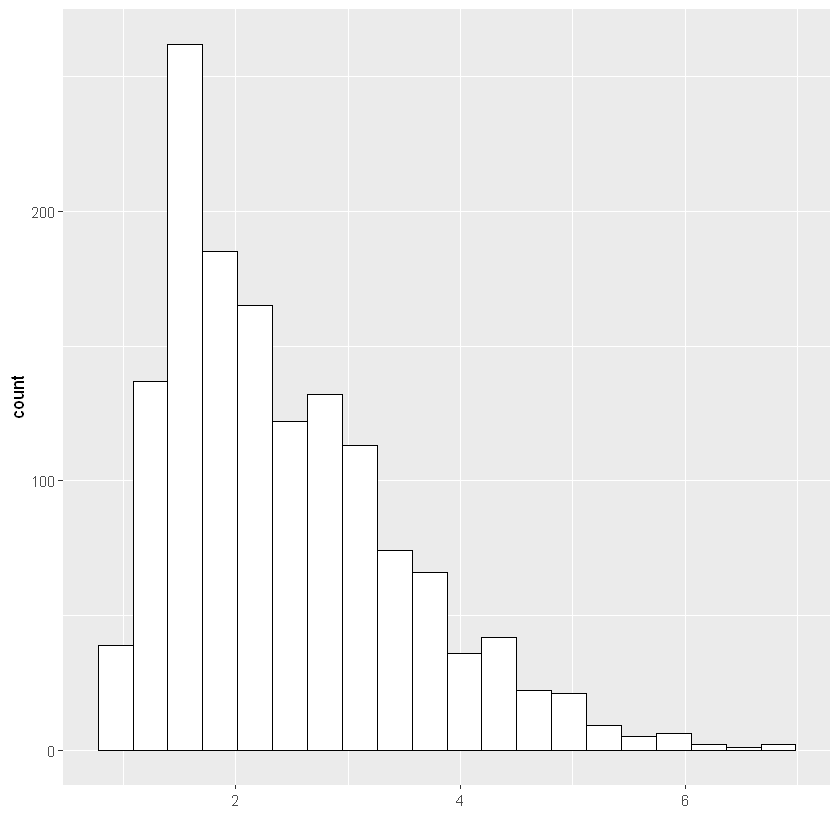

In [6]:
# 直方图
ggplot(data=AMIB_daily, aes(x=negaff)) +
  geom_histogram(fill="white", color="black",bins=20) +
  labs(x = "")

In [7]:
AMIB_imeans <- ddply(AMIB_daily, "id", summarize,
                       stress_trait = mean(stress, na.rm=TRUE),
                       negaff_trait = mean(negaff, na.rm=TRUE))
describe(AMIB_imeans)
head(AMIB_imeans)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,190,318.294737,130.4413245,321.50000,318.993421,151.2252000,101.0000,532.0000,431.000,-0.04393582,-1.0945398,9.46320829
stress_trait,2,190,1.395533,0.4788391,1.40625,1.394792,0.5096437,0.1875,2.5625,2.375,-0.04026841,-0.2337593,0.03473864
negaff_trait,3,190,2.478309,0.7335710,2.41250,2.429841,0.7227675,1.1125,5.0875,3.975,0.67593800,0.4505905,0.05321883


,id,stress_trait,negaff_trait
,<int>,<dbl>,<dbl>
1,101,1.06250,1.500000
2,102,0.78125,2.218750
3,103,1.25000,2.416667
4,104,1.81250,1.550000
5,105,1.75000,2.612500
6,106,1.12500,2.071875


In [8]:
# 合并进入个体间数据
AMIB_persons <- merge(AMIB_persons, AMIB_imeans, by="id")   

# 个体内数据中心化处理
AMIB_persons$bfi_n_c <- scale(AMIB_persons$bfi_n,center=TRUE,scale=FALSE)
AMIB_persons$stress_trait_c <- scale(AMIB_persons$stress_trait,center=TRUE,scale=FALSE)

# 描述个体间数据
describe(AMIB_persons)
head(AMIB_persons)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,190,3.182947e+02,130.4413245,321.50000000,3.189934e+02,151.2252000,101.000000,532.000000,431.000,-0.04393582,-1.0945398,9.46320829
bfi_n,2,190,2.981579e+00,0.9558661,3.00000000,2.996711e+00,1.4826000,1.000000,5.000000,4.000,-0.09238813,-0.8173050,0.06934582
stress_trait,3,190,1.395533e+00,0.4788391,1.40625000,1.394792e+00,0.5096437,0.187500,2.562500,2.375,-0.04026841,-0.2337593,0.03473864
negaff_trait,4,190,2.478309e+00,0.7335710,2.41250000,2.429841e+00,0.7227675,1.112500,5.087500,3.975,0.67593800,0.4505905,0.05321883
bfi_n_c,5,190,1.683047e-16,0.9558661,0.01842105,1.513158e-02,1.4826000,-1.981579,2.018421,4.000,-0.09238813,-0.8173050,0.06934582
stress_trait_c,6,190,1.927149e-17,0.4788391,0.01071742,-7.409148e-04,0.5096437,-1.208033,1.166967,2.375,-0.04026841,-0.2337593,0.03473864


,id,bfi_n,stress_trait,negaff_trait,bfi_n_c,stress_trait_c
,<int>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
1,101,2.0,1.06250,1.500000,-0.9815789,-0.3330326
2,102,2.0,0.78125,2.218750,-0.9815789,-0.6142826
3,103,2.5,1.25000,2.416667,-0.4815789,-0.1455326
4,104,2.5,1.81250,1.550000,-0.4815789,0.4169674
5,105,3.5,1.75000,2.612500,0.5184211,0.3544674
6,106,1.5,1.12500,2.071875,-1.4815789,-0.2705326


#### 在长数据中整合个体内变量


In [9]:
#个体间数据整合进入个体内数据中
daily_long <- merge(AMIB_daily,AMIB_persons,by="id")

# 计算状态性变量
daily_long$stress_state <- daily_long$stress - daily_long$stress_trait

# 描述数据
describe(daily_long)
head(daily_long)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,1458,3.225322e+02,129.0846742,324.00000000,324.198630137,151.2252000,101.000000,532.000000,431.000,-0.073110605,-1.0593095,3.38061661
day,2,1458,3.478738e+00,2.2958649,3.00000000,3.473458904,2.9652000,0.000000,7.000000,7.000,0.005561694,-1.2377728,0.06012673
negaff,3,1441,2.447490e+00,1.0406530,2.20000000,2.338038450,1.0378200,1.000000,6.900000,5.900,0.961778612,0.7745926,0.02741410
pss,4,1445,2.614475e+00,0.6843377,2.75000000,2.636560069,0.7413000,0.000000,4.000000,4.000,-0.354927563,0.1266323,0.01800266
stress,5,1445,1.385525e+00,0.6843377,1.25000000,1.363439931,0.7413000,0.000000,4.000000,4.000,0.354927563,0.1266323,0.01800266
bfi_n,6,1458,2.969479e+00,0.9564619,3.00000000,2.984160959,1.4826000,1.000000,5.000000,4.000,-0.075869134,-0.7908849,0.02504891
stress_trait,7,1458,1.387864e+00,0.4740143,1.40625000,1.389604483,0.5096437,0.187500,2.562500,2.375,-0.083982145,-0.2104134,0.01241403
negaff_trait,8,1458,2.451594e+00,0.7127765,2.37500000,2.407056986,0.6671700,1.112500,5.087500,3.975,0.663784545,0.5163553,0.01866700
bfi_n_c,9,1458,-1.210021e-02,0.9564619,0.01842105,0.002582012,1.4826000,-1.981579,2.018421,4.000,-0.075869134,-0.7908849,0.02504891


,id,day,negaff,pss,stress,bfi_n,stress_trait,negaff_trait,bfi_n_c,stress_trait_c,stress_state
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<dbl>
1,101,0,3.0,2.50,1.50,2,1.0625,1.5,-0.9815789,-0.3330326,0.4375
2,101,1,2.3,2.75,1.25,2,1.0625,1.5,-0.9815789,-0.3330326,0.1875
3,101,2,1.0,3.50,0.50,2,1.0625,1.5,-0.9815789,-0.3330326,-0.5625
4,101,3,1.3,3.00,1.00,2,1.0625,1.5,-0.9815789,-0.3330326,-0.0625
5,101,4,1.1,2.75,1.25,2,1.0625,1.5,-0.9815789,-0.3330326,0.1875
6,101,5,1.0,2.75,1.25,2,1.0625,1.5,-0.9815789,-0.3330326,0.1875


#### 
# 建立基本的MLM模型

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 4 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


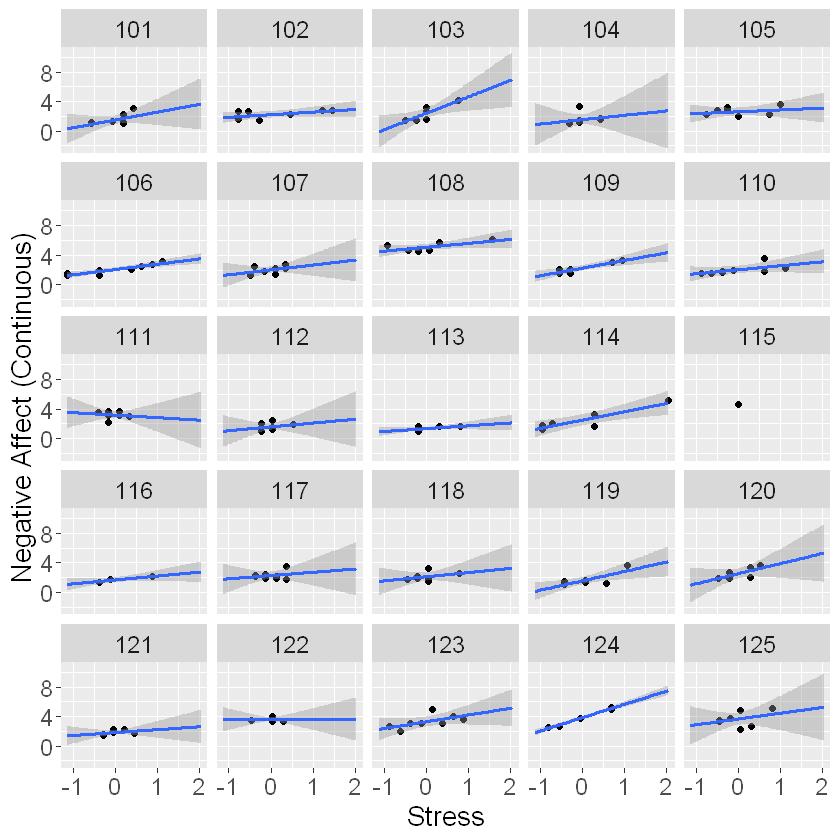

In [10]:
#faceted plot
ggplot(data=daily_long[which(daily_long$id <= 125),], aes(x=stress_state,y=negaff)) +
  geom_point() +
  stat_smooth(method="lm", fullrange=TRUE) +
  xlab("Stress") + ylab("Negative Affect (Continuous)") + 
  facet_wrap( ~ id) +
  theme(axis.title=element_text(size=16),
        axis.text=element_text(size=14),
        strip.text=element_text(size=14))

#### 使用 lmer() 拟合模型

In [11]:
model0_fit <- lmer(formula = negaff ~ 1 + (1|id), 
              data=daily_long,
              na.action=na.exclude)
summary(model0_fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: negaff ~ 1 + (1 | id)
   Data: daily_long

REML criterion at convergence: 3833.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8739 -0.6123 -0.1608  0.4658  3.9394 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 0.4270   0.6535  
 Residual             0.6627   0.8141  
Number of obs: 1441, groups:  id, 190

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   2.46368    0.05229 185.80793   47.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### 计算 intra-class correlation（ICC）：个体间变异（random intercept var）占总变异的分量

In [12]:
VarCorr(model0_fit)

 Groups   Name        Std.Dev.
 id       (Intercept) 0.65347 
 Residual             0.81408 

In [14]:
RandomEffects <- as.data.frame(VarCorr(model0_fit))
RandomEffects

 RandomEffects[1,4]

grp,var1,var2,vcov,sdcor
<chr>,<chr>,<chr>,<dbl>,<dbl>
id,(Intercept),NA,0.4270294,0.6534749
Residual,NA,NA,0.6627260,0.8140798


[1] 0.4270294

In [15]:
ICC_between <- RandomEffects[1,4]/(RandomEffects[1,4]+RandomEffects[2,4]) 
ICC_between

[1] 0.391858

说明 因变量（negative affect）中有39.19% 来源于被试间效应，60.81来源与个体内效应

#### 增加因变量 stress_trait 和 stress_state 

In [17]:
# 拟合模型
model1_fit <- lmer(formula = negaff ~ 1 + stress_trait_c + 
                      stress_state + stress_state:stress_trait_c + 
                      (1 + stress_state|id), 
                    data=daily_long,
                    na.action=na.exclude)
summary(model1_fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
negaff ~ 1 + stress_trait_c + stress_state + stress_state:stress_trait_c +  
    (1 + stress_state | id)
   Data: daily_long

REML criterion at convergence: 3228.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5573 -0.5981 -0.0800  0.5010  4.4839 

Random effects:
 Groups   Name         Variance Std.Dev. Corr
 id       (Intercept)  0.2118   0.4602       
          stress_state 0.1261   0.3552   0.55
 Residual              0.4288   0.6548       
Number of obs: 1438, groups:  id, 190

Fixed effects:
                             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                   2.46737    0.03779 182.65004  65.290   <2e-16 ***
stress_trait_c                1.04318    0.07972 184.90360  13.086   <2e-16 ***
stress_state                  0.77032    0.04647 166.76422  16.576   <2e-16 ***
stress_trait_c:stress_state   0.10616    0.09946 157.62829   1.

In [19]:
# 保存 被预测的结果
daily_long$pred_m1 <- predict(model1_fit)
daily_long$pred_m1

[1] 1.9146979 1.7594570 1.2937342 1.6042161 1.7594570 1.7594570 1.2937342
   [8] 1.7594570 1.9299911 1.6503416 1.6503416 2.9087641 1.6503416 1.7901663
  [15] 2.3494652 2.7689393 2.4464625 2.1897394 2.4464625 1.9330163 3.2166319
  [22] 2.4464625 1.7075263 1.9971071 1.8040533 1.7075263 1.9971071 1.8040533
  [29] 1.8040533 1.8040533 2.4855229 2.4855229 2.2059282 2.3457256 3.1845097
  [36] 3.0447123 2.6253203 2.6253203 1.8297083 1.8297083 2.8949133 2.5398449
  [43] 1.2971057 2.3623108 2.7173791 1.2971057 2.3016309 2.1318407 2.3016309
  [50] 2.1318407 1.9620505 1.7356635 2.1318407 1.7922603 3.7634281 6.2709020
  [57] 4.7664177 4.5156703 4.5156703 5.0171651 4.2649229 4.5156703 1.9541328
  [64] 2.1519051 1.9541328 2.9429943 3.1407666 2.1519051        NA 1.9766096
  [71] 1.5079917 2.4452275 2.7576394 1.8204037 1.8204037 1.6641977 2.4452275
  [78] 3.0009042 2.8100066 3.1918017 3.3826993 3.0009042 3.1918017 3.3826993
  [85] 3.0009042 1.9547627 1.4829631 1.6402296 1.4829631 1.6402296 1.6402296
  [92] 1.6402296 1.4829631 1.5097957 1.1917173 1.1917173 1.1917173 1.1917173
  [99] 1.8278742 1.1917173 1.1917173 4.5446192 1.5188207 1.7709706 2.7795701
 [106] 2.7795701 1.5188207 2.8963264 2.4118168 1.7273843 1.7273843 1.8642708
 [113] 2.2794137 2.4353041 2.1235233 2.2794137 2.4353041 2.1235233 2.5911945
 [120] 2.5911945 2.2883456 2.2883456 2.1438746 2.2883456 2.7217585 2.1438746
 [127] 1.9994037 2.5386497 1.3298681 2.1357225 1.3298681 1.7327953 1.3298681
 [134] 1.3298681 1.7327953 2.9765610 2.7485756 2.2926048        NA 2.2926048
 [141] 2.0646194        NA 2.7485756 2.0646973 1.9222506 1.7798039 1.9222506
 [148]        NA 2.2071440 1.9222506 1.7798039 3.7475962 3.5106578 3.5106578
 [155] 3.5106578 3.5106578 3.5106578 3.0367809 3.9956670 3.7448124 2.4905390
 [162] 2.9922483 3.4939577 2.7413937 2.2396843 3.2431030 4.5426229 2.5700938
 [169] 2.8988486 4.5426229 3.5563583 3.6387324 4.3415323 3.1701991 3.4044657
 [176] 3.4044657 3.1701991 3.8729990 3.6387324 2.9192315 2.3206793 2.1211619
 [183] 2.3206793 3.5177838 2.9192315 3.1187489 2.7425584 1.9075770 2.4085659
 [190] 2.4085659 2.7425584 2.2415696 4.0800165 3.0990102 2.4990250 2.0050528
 [197] 2.0050528 2.1697102 2.0050528 1.8403954 1.8403954 2.6821958 3.1420649
 [204] 1.9923922 1.9923922 1.9923922 2.4522613 3.1420649 2.4522613 2.2335429
 [211] 2.0590728 2.4080130 2.4080130 2.5824831 2.4080130 2.7569532 2.5824831
 [218] 3.1496429 2.1010282 2.1010282 2.1010282 2.1010282 2.1010282 2.5204741
 [225] 2.1010282 1.3021668 1.1280464 1.8245279 1.3021668 1.9986483 2.8692503
 [232] 1.6504075 1.8245279 3.5223059 3.0283623 3.5223059 5.2511084 2.0404751
 [239] 2.7813905 2.7813905 3.2753341 2.6374623 3.3819563 3.6301209 3.3819563
 [246] 3.3819563 3.1337916 3.8782856 2.8856270 3.0969589 3.0969589 2.4564389
 [253] 2.6165689 2.6165689 2.1361789 2.1361789 2.4564389 2.7641966 3.2487088
 [260] 2.7641966 3.0064527 3.9754772 3.4909650 3.4909650 2.0137597 1.3753043
 [267] 1.6945320 1.2156904 1.6945320 1.2156904 1.3753043 1.3753043 3.0606016
 [274] 3.5088321 3.2847168 3.5088321 3.2847168 3.0606016 2.6123711 2.8364863
 [281] 1.9152614 1.6428016 1.3703419 1.3703419 1.5065718 1.7790315 1.6428016
 [288] 1.9749477 1.8127952 1.8127952 1.6506427 1.8127952 1.9749477 1.8127952
 [295] 1.8127952 1.5853629 1.5853629 1.2926205 1.5853629 1.5853629 1.2926205
 [302] 1.1462493 1.1462493 1.8128135 2.8092782 2.8092782 2.0619296 2.8092782
 [309] 2.8092782 3.3075105 3.0583943 2.0300902 2.7084415 2.2562073 2.7084415
 [316] 2.7084415 3.6129099 4.2912612 3.6129099 2.0032368 2.0032368 1.8081108
 [323] 1.4178587 1.8081108 1.8081108 1.8081108 2.1983629 1.2919890 1.0074251
 [330] 1.0074251 1.1497070 1.1497070 1.1497070 1.1497070 1.1497070 3.2128114
 [337]        NA        NA        NA        NA        NA        NA 3.4245441
 [344] 1.8174306 1.8174306 1.8174306 1.9452937 1.9452937 1.9452937 1.6895675
 [351] 1.5617044 2.2177507 1.8400305 1.7141238 2.0918440 1.7141238 1.9659372
 [358] 2.4695641 1.9659372 1.6214353 1.4122840        NA        NA 3.0854944

#### 我们把 trait stress 对 negative affect 的效应可视化出来（个体间效应）

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
`geom_smooth()` using formula = 'y ~ x'


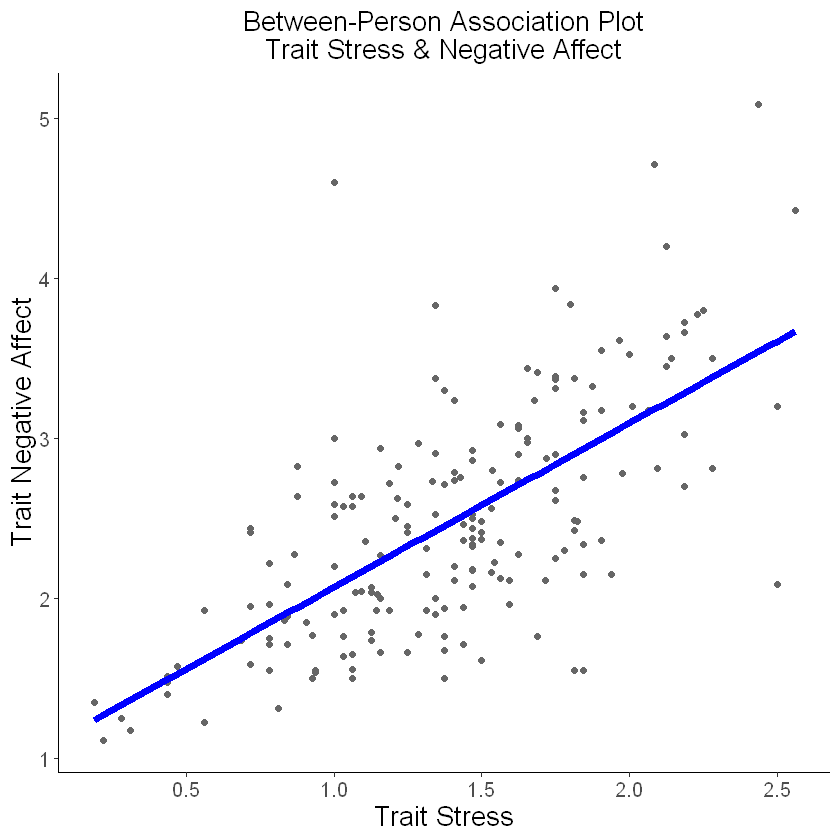

In [20]:
ggplot(data=AMIB_imeans, aes(x=stress_trait, y=negaff_trait, group=factor(id)), legend=FALSE) +
  geom_point(colour="gray40") +
  geom_smooth(aes(group=1), method=lm, se=FALSE, fullrange=FALSE, lty=1, size=2, color="blue") +
  xlab("Trait Stress") + ylab("Trait Negative Affect") +
  theme_classic() +
  theme(axis.title=element_text(size=16),
        axis.text=element_text(size=12),
        plot.title=element_text(size=16, hjust=.5)) +
  ggtitle("Between-Person Association Plot\nTrait Stress & Negative Affect")

#### 把 state stress 对 negative affect 的预测效应可视化出来（个体内效应）

`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite values (`stat_smooth()`)."
`geom_smooth()` using formula = 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite values (`stat_smooth()`)."


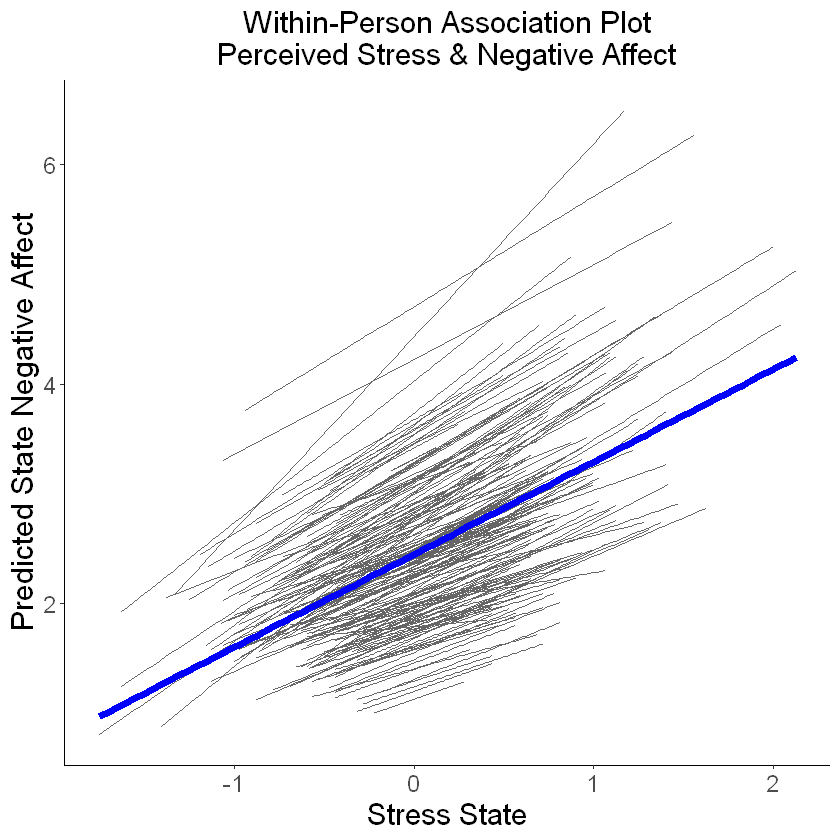

In [21]:
ggplot(data=daily_long, aes(x=stress_state, y=pred_m1, group=factor(id), colour="gray"), legend=FALSE) +
  geom_smooth(method=lm, se=FALSE, fullrange=FALSE, lty=1, size=.5, color="gray40") +
  geom_smooth(aes(group=1), method=lm, se=FALSE, fullrange=FALSE, lty=1, size=2, color="blue") +
  xlab("Stress State") + ylab("Predicted State Negative Affect") +
  theme_classic() +
  theme(axis.title=element_text(size=18),
        axis.text=element_text(size=14),
        plot.title=element_text(size=18, hjust=.5)) +
  ggtitle("Within-Person Association Plot\nPerceived Stress & Negative Affect")

#### 再增加一个个体间变量（trait neuroticism）

In [23]:
# 拟合模型
model2_fit <- lmer(formula = negaff ~ 1 + stress_trait_c + 
                      bfi_n_c + stress_trait_c:bfi_n_c +
                      stress_state + stress_state:stress_trait_c + 
                      stress_state:bfi_n_c + stress_state:stress_trait_c:bfi_n_c + 
                      (1 + stress_state|id),
                    data=daily_long,
                    na.action=na.exclude)
summary(model2_fit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: negaff ~ 1 + stress_trait_c + bfi_n_c + stress_trait_c:bfi_n_c +  
    stress_state + stress_state:stress_trait_c + stress_state:bfi_n_c +  
    stress_state:stress_trait_c:bfi_n_c + (1 + stress_state |      id)
   Data: daily_long

REML criterion at convergence: 3226.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4255 -0.5891 -0.0732  0.5135  4.5180 

Random effects:
 Groups   Name         Variance Std.Dev. Corr
 id       (Intercept)  0.1931   0.4395       
          stress_state 0.1197   0.3460   0.51
 Residual              0.4291   0.6551       
Number of obs: 1438, groups:  id, 190

Fixed effects:
                                      Estimate Std. Error         df t value
(Intercept)                           2.463348   0.037320 180.389031  66.006
stress_trait_c                        0.973398   0.078949 182.631122  12.329
bfi_n_c                               0.156647